<a href="https://colab.research.google.com/github/mostafadentist/python-ipynb/blob/main/Inventory_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

def eoq(D, S, H):
    Q = np.sqrt(2*D*S/H)
    return Q

D = 1000  # demand per year
S = 50    # ordering cost
H = 2     # holding cost

Q_opt = eoq(D, S, H)
print("Optimal EOQ =", round(Q_opt, 2))

Optimal EOQ = 223.61


In [2]:
def eoq_with_shortages(D, S, H, P):
    Q = np.sqrt((2*D*S/H) * (P/(P+H)))
    S_star = (H/(P+H)) * Q
    return Q, S_star

D, S, H, P = 1200, 60, 2, 4
Q, S_star = eoq_with_shortages(D, S, H, P)
print("Optimal order quantity =", round(Q,2))
print("Max shortage level =", round(S_star,2))

Optimal order quantity = 219.09
Max shortage level = 73.03


In [3]:
# Example: Price breaks
prices = [(0, 10), (500, 9.5), (1000, 9)]  # (min qty, price per unit)

D, S, H_percent = 5000, 40, 0.2

best_cost = float("inf")
best_Q = None

for min_qty, price in prices:
    H = H_percent * price
    Q = np.sqrt((2*D*S)/H)
    if Q < min_qty:  # must order at least min_qty
        Q = min_qty
    total_cost = (D*price) + (D/Q)*S + (Q/2)*H
    print(f"Price {price}, Q={round(Q,2)}, Total Cost={round(total_cost,2)}")
    if total_cost < best_cost:
        best_cost, best_Q = total_cost, Q

print("Best Order Quantity =", round(best_Q,2))
print("Minimum Total Cost =", round(best_cost,2))

Price 10, Q=447.21, Total Cost=50894.43
Price 9.5, Q=500, Total Cost=48375.0
Price 9, Q=1000, Total Cost=46100.0
Best Order Quantity = 1000
Minimum Total Cost = 46100.0


In [4]:
from scipy.stats import norm

def reorder_point(d, L, sigma, service_level=0.95):
    z = norm.ppf(service_level)
    return d*L + z*sigma*np.sqrt(L)

d, L, sigma = 100, 2, 20
ROP = reorder_point(d, L, sigma)
print("Reorder Point (ROP) =", round(ROP,2))

Reorder Point (ROP) = 246.52


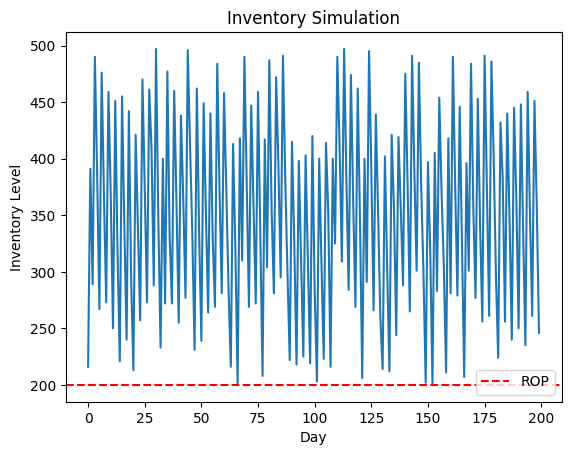

Total simulated cost = 73313


In [5]:
import matplotlib.pyplot as plt
import random

def simulate_inventory(Q, ROP, D_daily, sigma, days=100):
    inventory = Q
    costs = 0
    holding_cost = 1
    shortage_cost = 5
    order_cost = 50
    history = []

    for t in range(days):
        demand = int(random.gauss(D_daily, sigma))
        demand = max(0, demand)
        inventory -= demand

        if inventory < ROP:  # reorder
            costs += order_cost
            inventory += Q

        # holding/shortage cost
        if inventory >= 0:
            costs += inventory * holding_cost
        else:
            costs += abs(inventory) * shortage_cost

        history.append(inventory)

    return costs, history

costs, history = simulate_inventory(Q=300, ROP=200, D_daily=100, sigma=20, days=200)
plt.plot(history)
plt.axhline(200, color='r', linestyle='--', label="ROP")
plt.title("Inventory Simulation")
plt.xlabel("Day")
plt.ylabel("Inventory Level")
plt.legend()
plt.show()

print("Total simulated cost =", costs)